In [60]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

Qns1. Import asset_details.csv and train.csv after downloading the dataset from (https://www.ka
ggle.com/competitions/g-research-crypto-forecasting/data), state whether you need to
perform any data preprocessing including outliers detection and handling missing values on
this dataset, and also check for missing data for the timestamp column if any is missing
values impute the data with appropriate methods and do other standard preprocessing
steps if needed. (10 marks)

In [61]:
data_files = os.chdir('C:/Users/TEE/Music/Practicum2')
#data_files = os.chdir('/Users/peilin.t/Downloads')
raw_data = pd.read_csv('train.csv')
raw_data

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [62]:
raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp'],unit="s")
raw_data_final=raw_data.set_index('timestamp')
raw_data_final

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
2018-01-01 00:01:00,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
2018-01-01 00:01:00,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2018-01-01 00:01:00,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
2018-01-01 00:01:00,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
2018-01-01 00:01:00,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...
2021-09-21 00:00:00,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
2021-09-21 00:00:00,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
2021-09-21 00:00:00,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN


Qns2. Make three subgroups of the data, consisting of the information of the following three
cryptocurrencies: Bitcoin (Asset id:1 ), Ethereum (Asset id: 6), and Dogecoin (Asset id: 4).
Split the time series datasets into a train (70%) and a test (30%). (10 marks)

In [63]:
#extract bitcoin data
Bitcoin_df = raw_data_final[raw_data_final['Asset_ID'] == 1]
Bitcoin_data=Bitcoin_df.drop('Asset_ID',axis=1)
Bitcoin_data

,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,
2018-01-01 00:01:00,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643
2018-01-01 00:02:00,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037
2018-01-01 00:03:00,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309
2018-01-01 00:04:00,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999
2018-01-01 00:05:00,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079
...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
2021-09-20 23:57:00,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
2021-09-20 23:58:00,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN


In [64]:
Bitcoin_data.isna().sum()

Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target    304
dtype: int64

In [65]:
#fill up the missing values
Bitcoin=Bitcoin_data.interpolate()
Bitcoin_close=Bitcoin[['Close']]
Bitcoin_target=Bitcoin[['Target']]

In [66]:
#extract Ethereum data
Ethereum_df = raw_data_final[raw_data_final['Asset_ID'] == 6]
Ethereum_data=Ethereum_df.drop('Asset_ID',axis=1)
Ethereum_data

,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,
2018-01-01 00:01:00,173.0,738.302500,746.00,732.51,738.507500,335.987856,738.839291,-0.004809
2018-01-01 00:02:00,192.0,738.507500,745.14,732.49,738.260000,232.793141,738.268967,-0.004441
2018-01-01 00:03:00,120.0,738.332500,745.12,730.00,737.502500,174.138031,737.994457,-0.004206
2018-01-01 00:04:00,156.0,737.222500,744.69,728.93,737.102500,165.383926,737.303631,-0.002205
2018-01-01 00:05:00,118.0,736.530000,743.80,727.11,735.705000,193.078039,736.163026,-0.001744
...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,2162.0,2973.728686,2976.10,2962.09,2964.711429,751.256906,2968.339295,NaN
2021-09-20 23:57:00,1976.0,2965.461446,2967.95,2958.05,2960.845714,729.113672,2963.499199,NaN
2021-09-20 23:58:00,2262.0,2960.321429,2962.60,2954.14,2957.398571,807.935362,2958.464868,NaN


In [67]:
Ethereum_data.isna().sum()

Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target    340
dtype: int64

In [68]:
#fill up the missing values
Ethereum=Ethereum_data.interpolate()
Ethereum_close=Ethereum[['Close']]
Ethereum_target=Ethereum[['Target']]

In [69]:
#extract Dogecoin data
Dogecoin_df = raw_data_final[raw_data_final['Asset_ID'] == 4]
Dogecoin_data=Dogecoin_df.drop('Asset_ID',axis=1)
Dogecoin_data

,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,
2019-04-12 14:34:00,10.0,0.002775,0.002775,0.002773,0.002775,1.921090e+05,0.002775,0.006126
2019-04-12 14:35:00,14.0,0.002772,0.002775,0.002771,0.002775,7.039900e+04,0.002773,0.007576
2019-04-12 14:36:00,7.0,0.002773,0.002775,0.002772,0.002772,2.174830e+05,0.002775,0.008655
2019-04-12 14:37:00,7.0,0.002773,0.002775,0.002773,0.002773,4.247299e+06,0.002773,0.009373
2019-04-12 14:38:00,21.0,0.002772,0.002775,0.002772,0.002774,1.733760e+05,0.002774,0.009369
...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,483.0,0.208072,0.208200,0.207294,0.207445,1.895146e+06,0.207764,NaN
2021-09-20 23:57:00,394.0,0.207461,0.207540,0.206800,0.206920,1.059219e+06,0.207244,NaN
2021-09-20 23:58:00,297.0,0.206892,0.207100,0.206600,0.206797,4.201725e+05,0.206832,NaN


In [70]:
Dogecoin_data.isna().sum()

Count          0
Open           0
High           0
Low            0
Close          0
Volume         0
VWAP           0
Target    144974
dtype: int64

In [71]:
#fill up the missing values
Dogecoin=Dogecoin_data.interpolate()
Dogecoin_close=Dogecoin[['Close']]
Dogecoin_target=Dogecoin[['Target']]

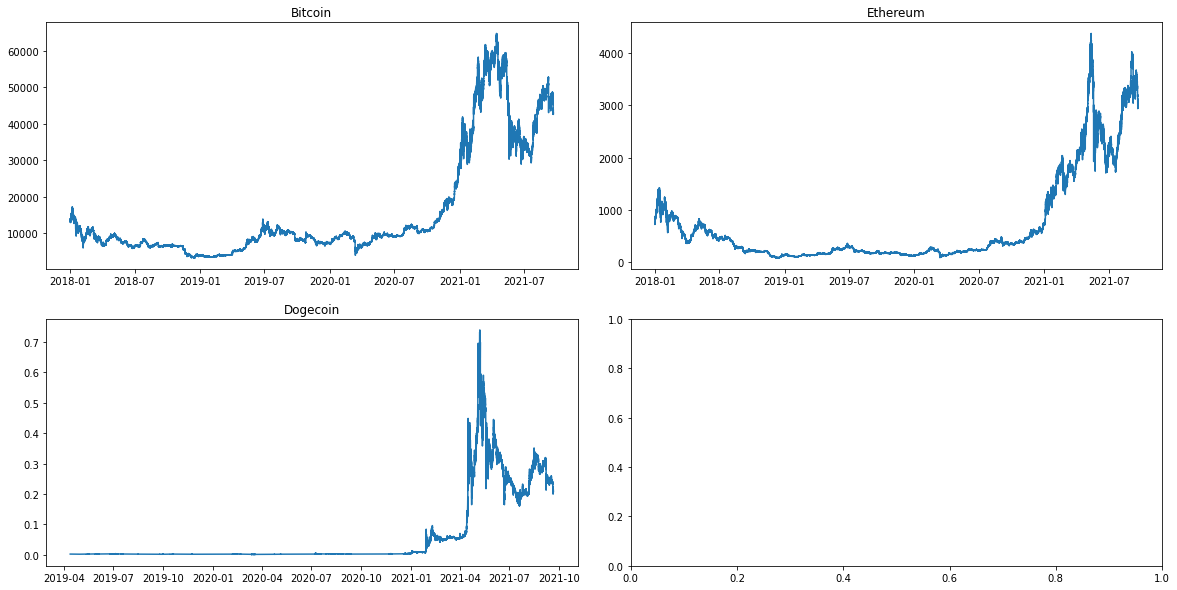

In [72]:
# ploting the Close for 3 cryptocurrencies
fig, axs =plt.subplots(2,2,figsize=(20,10),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(Bitcoin_close)
axs[0,0].set_title('Bitcoin')
axs[0,1].plot(Ethereum_close)
axs[0,1].set_title('Ethereum')
axs[1,0].plot(Dogecoin_close)
axs[1,0].set_title('Dogecoin')
plt.show()

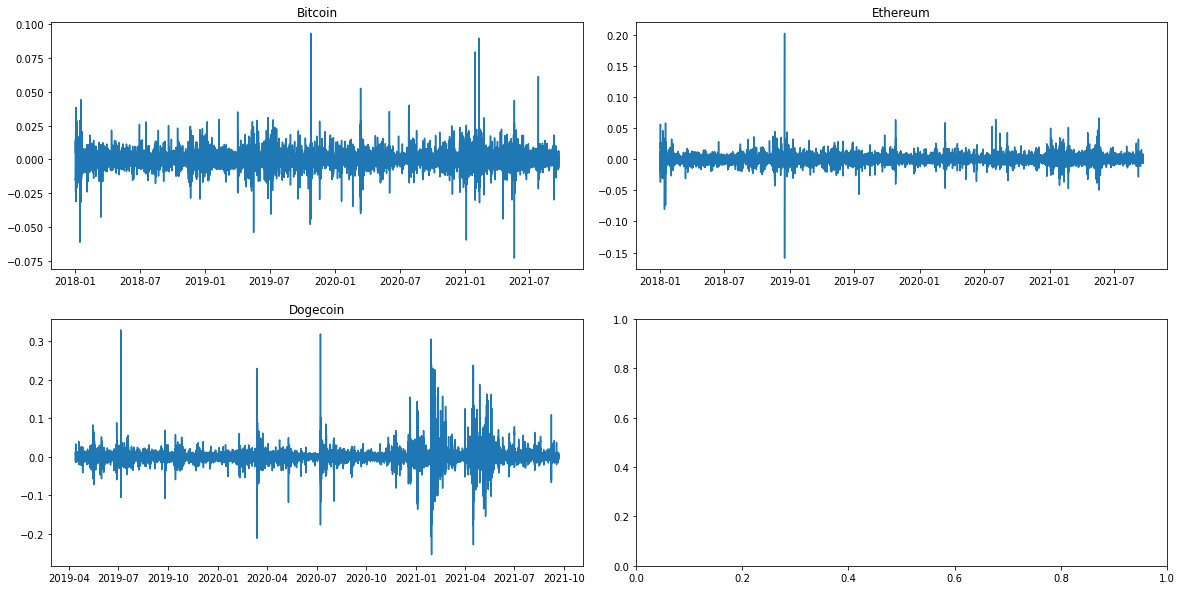

In [73]:
# ploting the Target for 3 cryptocurrencies
fig, axs =plt.subplots(2,2,figsize=(20,10),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(Bitcoin_target)
axs[0,0].set_title('Bitcoin')
axs[0,1].plot(Ethereum_target)
axs[0,1].set_title('Ethereum')
axs[1,0].plot(Dogecoin_target)
axs[1,0].set_title('Dogecoin')
plt.show()

In [74]:
#resample the sub datasets into days
df_bitcoin=Bitcoin_close.resample("D").mean()
df_ethereum=Ethereum_close.resample("D").mean()
df_dogecoin=Dogecoin_close.resample("D").mean()
df_Bitcoin=Bitcoin_target.resample("D").mean()
df_Ethereum=Ethereum_target.resample("D").mean()
df_Dogecoin=Dogecoin_target.resample("D").mean()

In [75]:
def split_data(data, percent):
  train_size = int(len(data) * percent)
  train, test = data[0:train_size], data[train_size:]
  return train, test

In [76]:
#Split the time series datasets for Close 
percent=0.7
bitcoin_train_test=split_data(df_bitcoin, percent)
ethereum_train_test=split_data(df_ethereum, percent)
dogecoin_train_test=split_data(df_dogecoin, percent)

In [77]:
#Split the time series datasets for Target
percent=0.7
Bitcoin_train_test=split_data(df_Bitcoin, percent)
Ethereum_train_test=split_data(df_Ethereum, percent)
Dogecoin_train_test=split_data(df_Dogecoin, percent)

Qns3.Plot autocorrelation plots and decompose the sub-group data sets using the seasonal
decompose function (statsmodels) and explain your key takeaways from plots in the report.

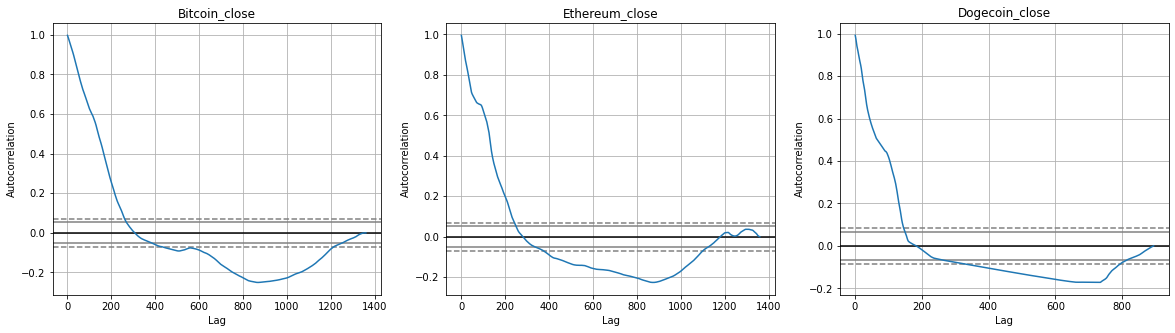

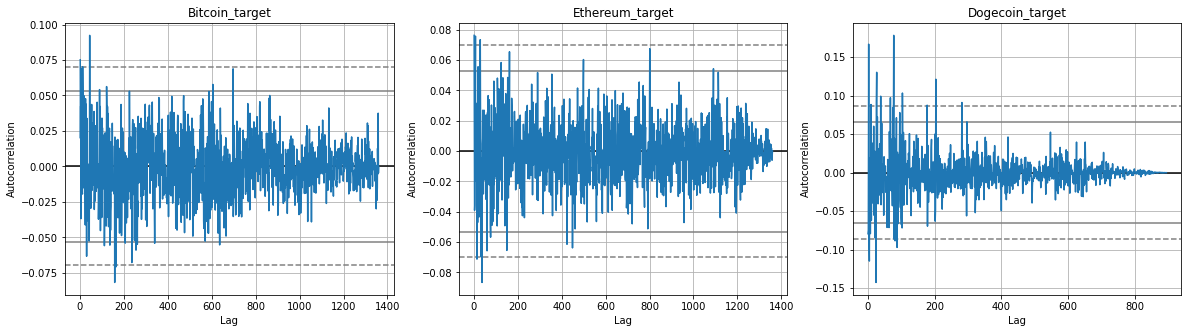

In [78]:
#autocorrelation plots for 3 crytocurrencies Close and Target
from pandas.plotting import autocorrelation_plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.2)
pd.plotting.autocorrelation_plot(df_bitcoin, ax=ax1)
pd.plotting.autocorrelation_plot(df_ethereum, ax=ax2)
pd.plotting.autocorrelation_plot(df_dogecoin, ax=ax3)
pd.plotting.autocorrelation_plot(df_Bitcoin, ax=ax4)
pd.plotting.autocorrelation_plot(df_Ethereum, ax=ax5)
pd.plotting.autocorrelation_plot(df_Dogecoin, ax=ax6)
ax1.title.set_text('Bitcoin_close')
ax2.title.set_text('Ethereum_close')
ax3.title.set_text('Dogecoin_close')
ax4.title.set_text('Bitcoin_target')
ax5.title.set_text('Ethereum_target')
ax6.title.set_text('Dogecoin_target')

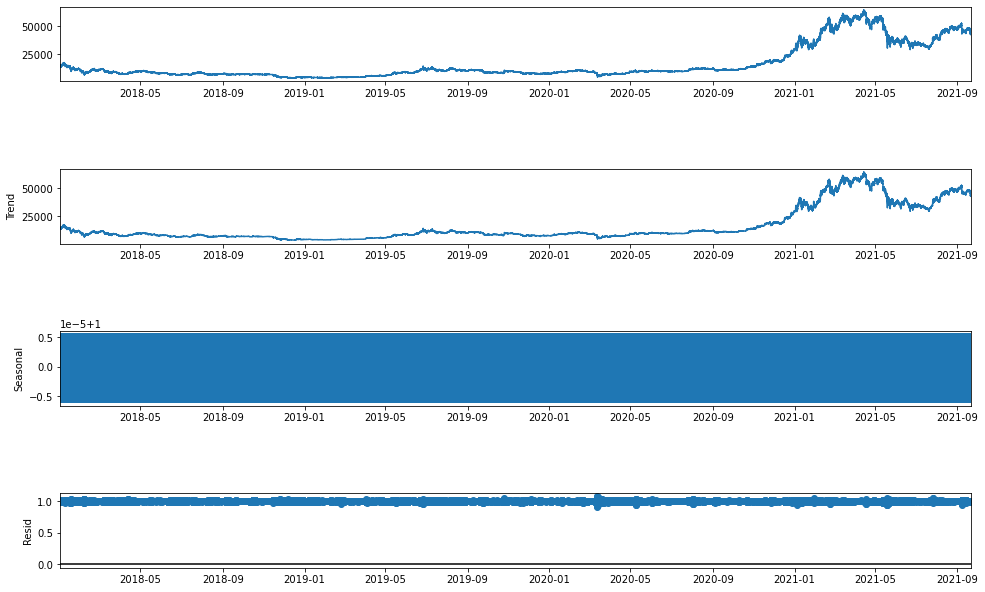

In [79]:
#seasonal_decompose plot for bitcoin close, model='mul'
from statsmodels.tsa.seasonal import seasonal_decompose
result_bitcoin_mul = seasonal_decompose(Bitcoin_close, model='mul',period=20) 
fig_bitcoin_mul=result_bitcoin_mul.plot()
fig_bitcoin_mul.set_size_inches((16, 9))
plt.show();

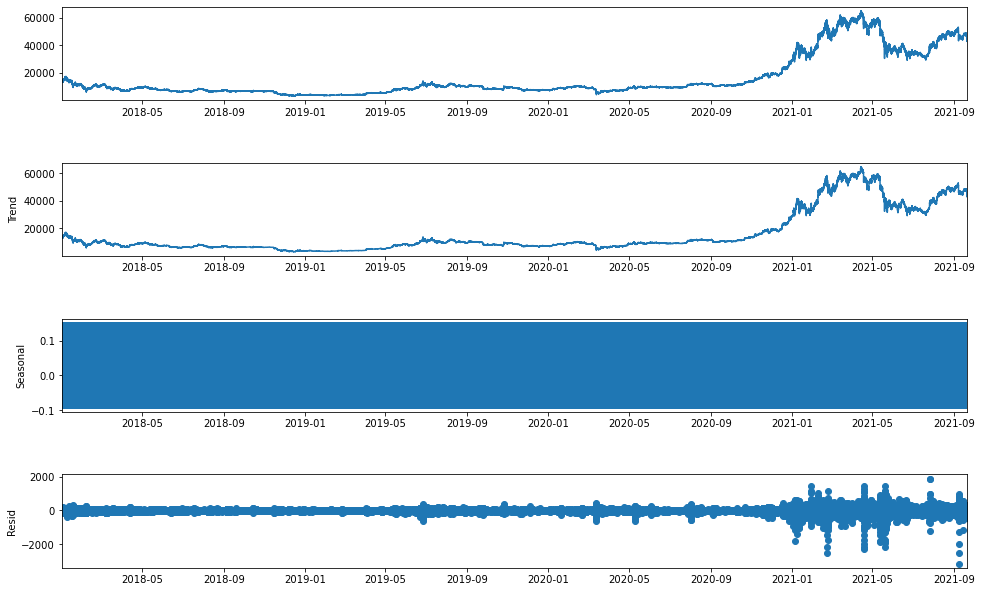

In [80]:
#seasonal_decompose plot for bitcoin close,model='add'
result_bitcoin_add = seasonal_decompose(Bitcoin_close, model='add',period=20) 
fig_bitcoin_add=result_bitcoin_add.plot()
fig_bitcoin_add.set_size_inches((16, 9))
plt.show();

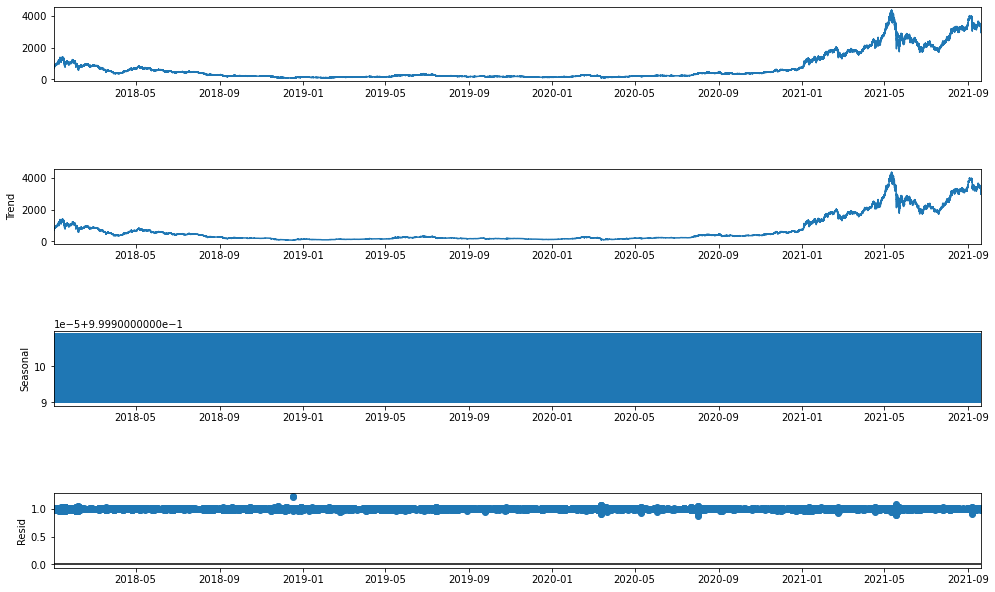

In [81]:
#seasonal_decompose plot for Ethereum close,model='mul'
result_ethereum_mul = seasonal_decompose(Ethereum_close, model='mul',period=20) 
fig_ethereum_mul=result_ethereum_mul.plot()
fig_ethereum_mul.set_size_inches((16, 9))
plt.show();

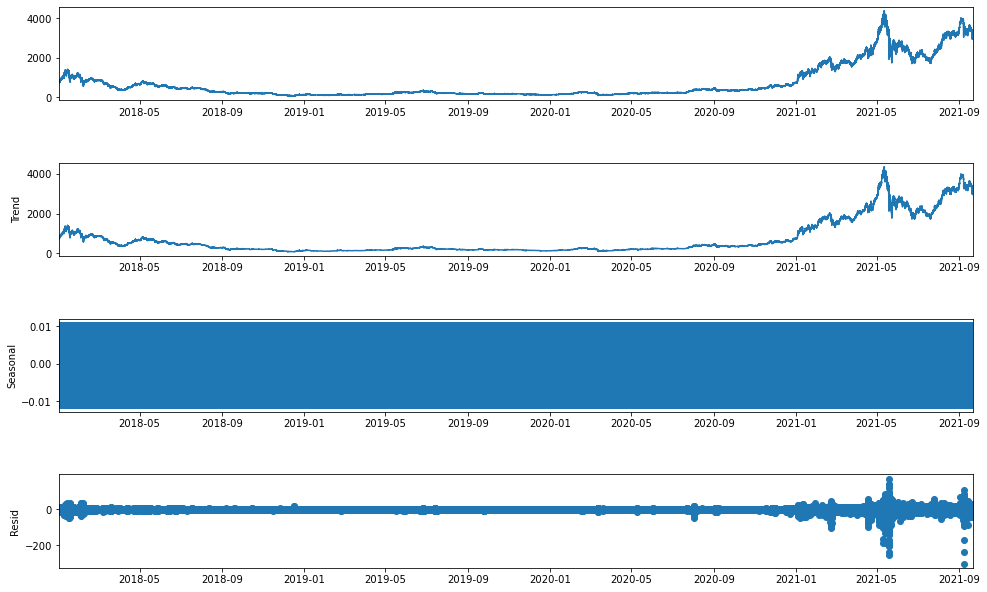

In [82]:
#seasonal_decompose plot for Ethereum close,model='add'
result_ethereum_add = seasonal_decompose(Ethereum_close, model='add',period=20) 
fig_ethereum_add=result_ethereum_add.plot()
fig_ethereum_add.set_size_inches((16, 9))
plt.show();

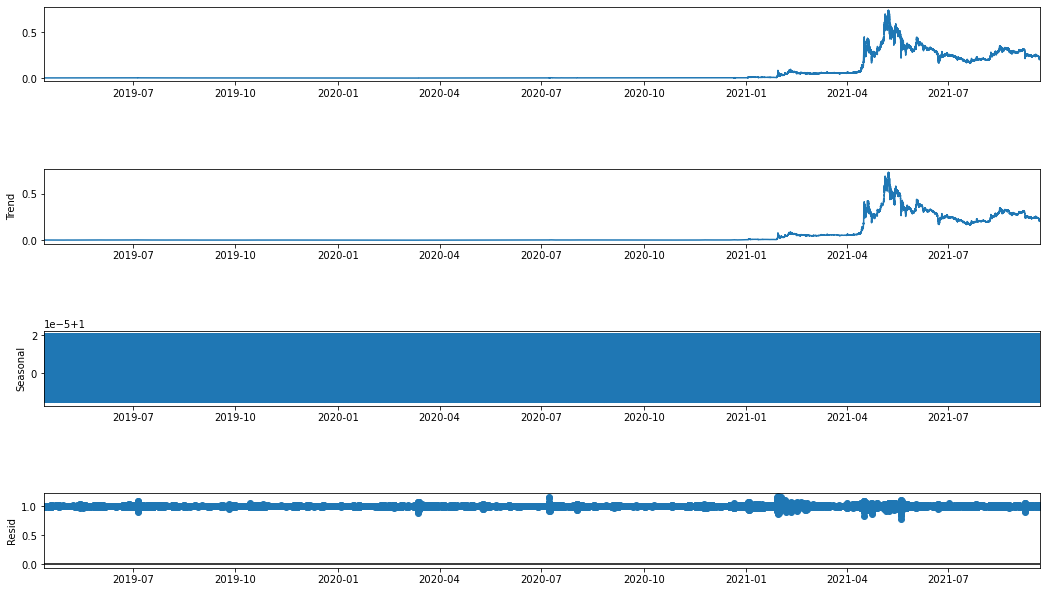

In [83]:
#seasonal_decompose plot for Dogecoin close,model='mul'
result_dogecoin_mul = seasonal_decompose(Dogecoin_close, model='mul',period=20) 
fig_dogecoin_mul=result_dogecoin_mul.plot()
fig_dogecoin_mul.set_size_inches((16, 9))
plt.show();

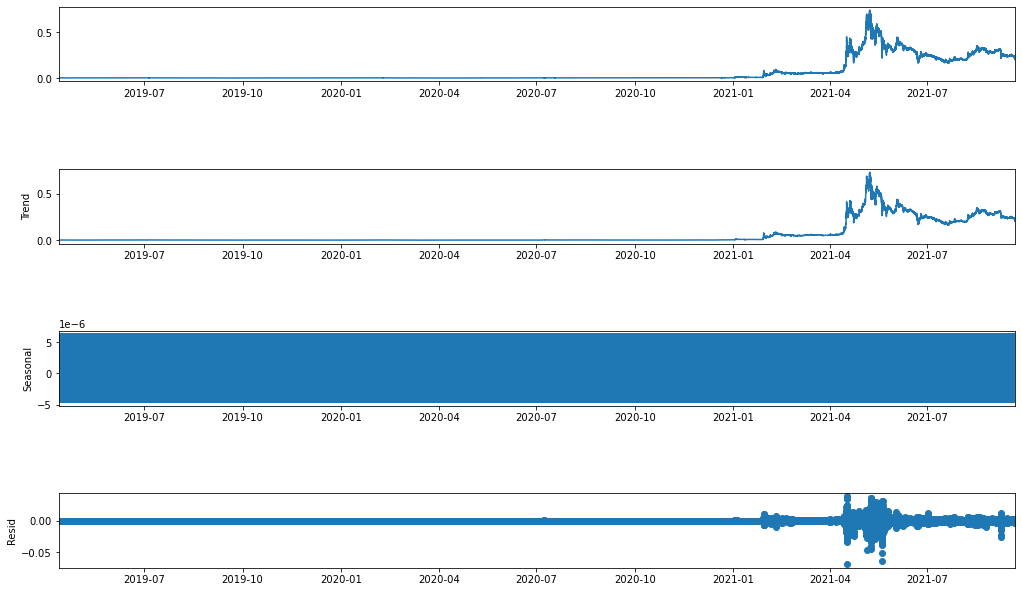

In [84]:
#seasonal_decompose plot for Dogecoin close,model='add'
result_dogecoin_add = seasonal_decompose(Dogecoin_close, model='add',period=20) 
fig_dogecoin_add=result_dogecoin_add.plot()
fig_dogecoin_add.set_size_inches((16, 9))
plt.show();

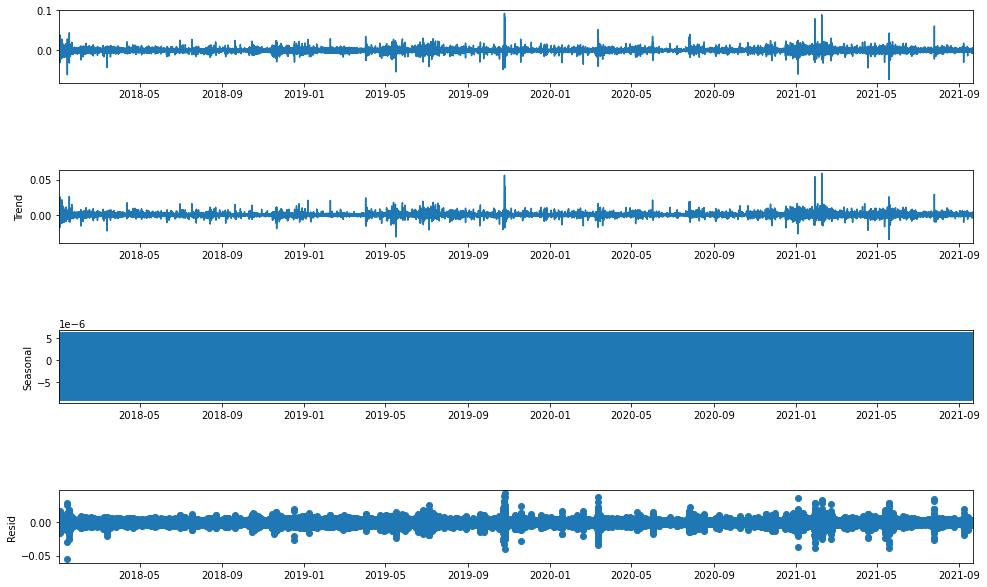

In [85]:
#seasonal_decompose plot for Bitcoin target,model='add'
result_Bitcoin_add = seasonal_decompose(Bitcoin_target, model='add',period=20) 
fig_Bitcoin_add=result_Bitcoin_add.plot()
fig_Bitcoin_add.set_size_inches((16, 9))
plt.show();

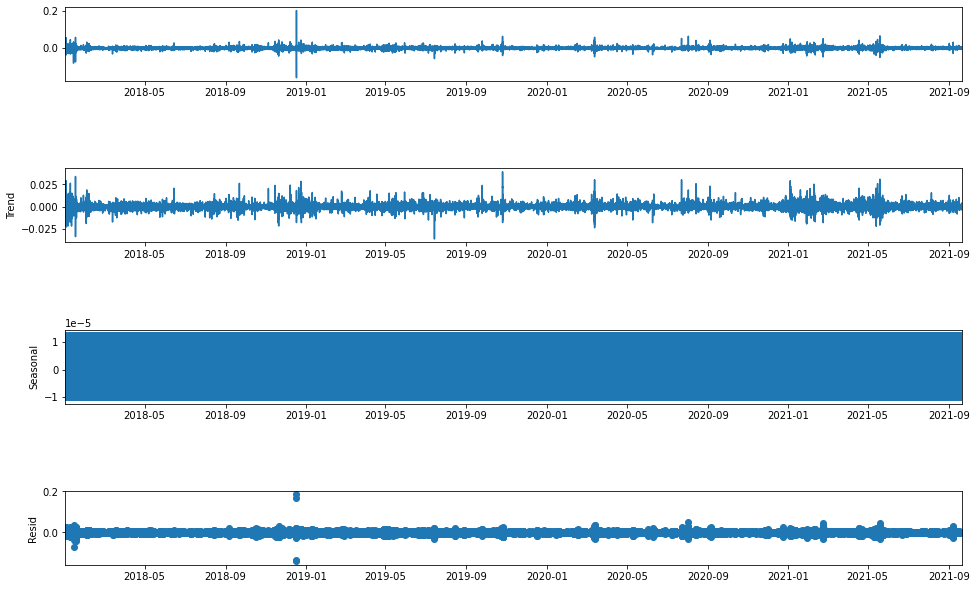

In [86]:
#seasonal_decompose plot for Ethereum target,model='add'
result_Ethereum_add = seasonal_decompose(Ethereum_target, model='add',period=20) 
fig_Ethereum_add=result_Ethereum_add.plot()
fig_Ethereum_add.set_size_inches((16, 9))
plt.show();

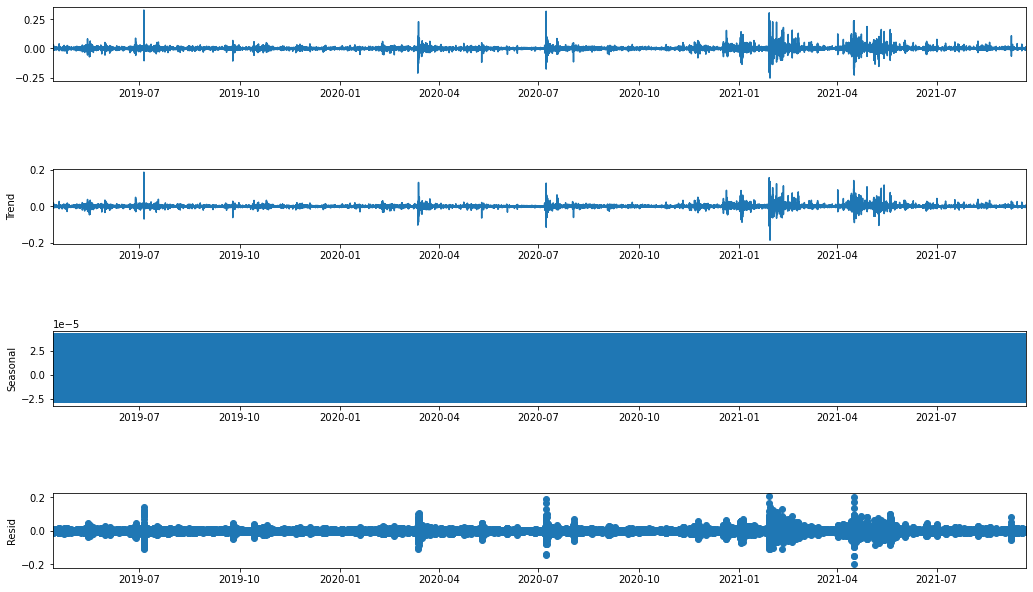

In [87]:
#seasonal_decompose plot for Dogecoin target,model='add'
result_Dogecoin_add = seasonal_decompose(Dogecoin_target, model='add',period=20) 
fig_Dogecoin_add=result_Dogecoin_add.plot()
fig_Dogecoin_add.set_size_inches((16, 9))
plt.show();

Qns4. Explain the concepts of moving averages, and auto-regression in your report and construct the moving average and Arima equation for predicting the close and target for Bitcoin,Ethereum, and Dogecoin. Optimize the hyperparameters (p,d, and q) of ARIMA model toachieve the best accuracy in terms of MAPE (Mean Absolute percentage error). (10 marks).

Qns5. Find RMSE(Root Mean Square Error) and MAPE (Mean Absolute percentage error) of
predicted value and actual value from the test dataset. (5 marks)

In [88]:
from sklearn.metrics import mean_absolute_percentage_error
import pandas.util.testing as tm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    train, test = X[0].values, X[1].values
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
       # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    error = mean_absolute_percentage_error(test, predictions)
    return rmse,error 
 
def evaluate_models(dataset, p_values, d_values, q_values):
    lst=[]
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)[0]
                    error= evaluate_arima_model(dataset, order)[1]
                    lst.append((order,rmse,error))
                except:
                    continue
    min_tuple = min(lst, key=lambda item: item[2])
    return(f'best p,d,q ={min_tuple[0]}, RMSE value ={min_tuple[1]}, lowest MAPE value ={min_tuple[2]}')

In [89]:
import warnings
# evaluate parameters
p_values = d_values= q_values= range(0,5)
warnings.filterwarnings("ignore")

In [29]:
print('Results for Dogecoin Close:')
d_lst=evaluate_models(dogecoin_train_test, p_values, d_values, q_values)
print(d_lst)

Results for Dogecoin:
best p,d,q =(0, 1, 0), RMSE value =0.024593205119807164, lowest MAPE value =0.05896277047840079


In [30]:
print('Results for Ethereum Close:')
e_lst=evaluate_models(ethereum_train_test, p_values, d_values, q_values)
print(e_lst)

Results for Ethereum:
best p,d,q =(1, 1, 0), RMSE value =88.59611718183469, lowest MAPE value =0.03133092677381613


In [31]:
print('Results for Bitcoin Close:')
b_lst=evaluate_models(bitcoin_train_test, p_values, d_values, q_values)
print(b_lst)

Results for Bitcoin:
best p,d,q =(0, 2, 1), RMSE value =1345.2126989185801, lowest MAPE value =0.023728830103463116


In [62]:
print('Results for Dogecoin Target:')
D_lst=evaluate_models(Dogecoin_train_test, p_values, d_values, q_values)
print(D_lst)

Results for Dogecoin Target:
best p,d,q =(0, 0, 0), RMSE value =0.0013294429042115168, lowest MAPE value =1.2934447047212214


In [63]:
print('Results for Ethereum Target:')
E_lst=evaluate_models(Ethereum_train_test, p_values, d_values, q_values)
print(E_lst)

Results for Ethereum Target:
best p,d,q =(0, 0, 0), RMSE value =0.00030312246305027663, lowest MAPE value =1.0323851752239994


In [64]:
print('Results for Bitcoin Target:')
B_lst=evaluate_models(Bitcoin_train_test, p_values, d_values, q_values)
print(B_lst)

Results for Bitcoin Target:
best p,d,q =(0, 0, 0), RMSE value =0.00028932887047023224, lowest MAPE value =1.0020300260829107


Qns6. Develop a machine learning model of your choice (ex: SVM, random forest regression) except
linear regression and optimize the key hyperparameter to achieve the best accuracy to
predict the close and target for Bitcoin, Ethereum, and Dogecoin. Repeat step 5 for the
machine learning model and find RMSE and MAPE. (10 marks model development-10 marks
hyperparameter tuning-20 marks)

In [90]:
from numpy import asarray
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [91]:
dogecoin_train=dogecoin_train_test[0]
dogecoin_test=dogecoin_train_test[1]
ethereum_train=ethereum_train_test[0]
ethereum_test=ethereum_train_test[1]
bitcoin_train=bitcoin_train_test[0]
bitcoin_test=bitcoin_train_test[1]

In [92]:
dogecoin_train_data=series_to_supervised(dogecoin_train, n_in=10, n_out=1, dropnan=True)
dogecoin_test_data=series_to_supervised(dogecoin_test, n_in=10, n_out=1, dropnan=True)
dogecoin_train_dataY=dogecoin_train_data['var1(t)']
dogecoin_train_dataX=dogecoin_train_data.drop('var1(t)',axis=1)
dogecoin_test_dataY=dogecoin_train_data['var1(t)']
dogecoin_test_dataX=dogecoin_train_data.drop('var1(t)',axis=1)

In [93]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

def model_selection(X_train, Y_train):
    models = []
    models.append(('RFR', RandomForestRegressor()))
    models.append(('ADA', AdaBoostRegressor()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor()))
    models.append(('GBR', GradientBoostingRegressor()))
    models.append(('SVM', SVR()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'neg_mean_absolute_percentage_error'
    for name, model in models:
        tscv = TimeSeriesSplit(n_splits=5)
        cv_results = cross_val_score(model, X_train, Y_train, cv=tscv, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: MAPE: %f " % (name, abs(cv_results.mean()))
        print(msg)

In [99]:
#Model for dogecoin Close,choose model with the lowest MAPE
model_selection(dogecoin_train_dataX, dogecoin_train_dataY)

RFR: MAPE: 0.046483 
ADA: MAPE: 0.048232 
KNN: MAPE: 0.056506 
CART: MAPE: 0.055297 
GBR: MAPE: 0.042270 
SVM: MAPE: 0.224672 


In [53]:
parameters = {'learning_rate': [0.01,0.005,0.001],
                  'subsample'    : [0.7,0.8,1],
                  'n_estimators' : [1000,1250,1750],
                  'max_depth'    : [4,5,7],
                  'min_samples_split':[20,40,100],
                  'min_samples_leaf':[3,5,7],
                  'max_features':[3,4,7]
                 }
GBR = GradientBoostingRegressor()
tscv = TimeSeriesSplit(n_splits=5)
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = tscv, n_jobs=-1)
gridGBR_result=grid_GBR.fit(dogecoin_train_dataX, dogecoin_train_dataY)
print("\n The best parameters across ALL searched params:\n",gridGBR_result.best_params_)
model = GradientBoostingRegressor(learning_rate=gridGBR_result.best_params_['learning_rate'],
                                   subsample=gridGBR_result.best_params_['subsample'],
                                   n_estimators=gridGBR_result.best_params_['n_estimators'],
                                   max_depth=gridGBR_result.best_params_['max_depth'],
                                   min_samples_split=gridGBR_result.best_params_['min_samples_split'],
                                   min_samples_leaf=gridGBR_result.best_params_['min_samples_leaf'],
                                   max_features=gridGBR_result.best_params_['max_features']
                                 )
GBR_model=model.fit(dogecoin_train_dataX, dogecoin_train_dataY)
y_pred_test_GBR = GBR_model.predict(dogecoin_test_dataX)
rmse_GBR = sqrt(mean_squared_error(dogecoin_test_dataY, y_pred_test_GBR))
error_GBR = mean_absolute_percentage_error(dogecoin_test_dataY, y_pred_test_GBR)
print("\n RMSE using Gradient Boosting Regression model:",
rmse_GBR)
print("\n MAPE using Gradient Boosting Regression model:",
error_GBR)


 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 40, 'n_estimators': 1000, 'subsample': 0.8}

 RMSE using Gradient Boosting Regression model: 3.491722739058418e-05

 MAPE using Gradient Boosting Regression model: 0.008920027242506245


In [94]:
ethereum_train_data=series_to_supervised(ethereum_train, n_in=10, n_out=1, dropnan=True)
ethereum_test_data=series_to_supervised(ethereum_test, n_in=10, n_out=1, dropnan=True)
ethereum_train_dataY=ethereum_train_data['var1(t)']
ethereum_train_dataX=ethereum_train_data.drop('var1(t)',axis=1)
ethereum_test_dataY=ethereum_train_data['var1(t)']
ethereum_test_dataX=ethereum_train_data.drop('var1(t)',axis=1)

In [103]:
#Model for ethereum Close,choose model with the lowest MAPE
model_selection(ethereum_train_dataX, ethereum_train_dataY)

RFR: MAPE: 0.174072 
ADA: MAPE: 0.294344 
KNN: MAPE: 0.194736 
CART: MAPE: 0.173689 
GBR: MAPE: 0.185742 
SVM: MAPE: 0.821760 


In [62]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt"],
           "max_leaf_nodes":[10,20,30,40,50,60,70,80,90] }

cart = DecisionTreeRegressor()
grid_cart = GridSearchCV(estimator=cart, param_grid = parameters, cv = tscv, n_jobs=-1)
gridcart_result=grid_cart.fit(ethereum_train_dataX, ethereum_train_dataY)
print("\n The best parameters across ALL searched params:\n",gridGBR_result.best_params_)
model0 = DecisionTreeRegressor(splitter=gridcart_result.best_params_['splitter'],
                                max_depth=gridcart_result.best_params_['max_depth'],
                                min_samples_leaf=gridcart_result.best_params_['min_samples_leaf'],
                                min_weight_fraction_leaf=gridcart_result.best_params_['min_weight_fraction_leaf'],
                                max_features=gridcart_result.best_params_['max_features'],
                                max_leaf_nodes=gridcart_result.best_params_['max_leaf_nodes']
                                 )
cart_model=model0.fit(ethereum_train_dataX, ethereum_train_dataY)
y_pred_test_cart = cart_model.predict(ethereum_test_dataX)
rmse_cart = sqrt(mean_squared_error(ethereum_test_dataY, y_pred_test_cart))
error_cart = mean_absolute_percentage_error(ethereum_test_dataY, y_pred_test_cart)
print("\n RMSE using Decision Tree Regression model:",
rmse_cart)
print("\n MAPE using Decision Tree Regression model:",
error_cart)


 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 40, 'n_estimators': 1000, 'subsample': 0.8}

 RMSE using Decision Tree Regression model: 83.82735447964059

 MAPE using Decision Tree Regression model: 0.0920470823266285


In [95]:
bitcoin_train_data=series_to_supervised(bitcoin_train, n_in=10, n_out=1, dropnan=True)
bitcoin_test_data=series_to_supervised(bitcoin_test, n_in=10, n_out=1, dropnan=True)
bitcoin_train_dataY=bitcoin_train_data['var1(t)']
bitcoin_train_dataX=bitcoin_train_data.drop('var1(t)',axis=1)
bitcoin_test_dataY=bitcoin_train_data['var1(t)']
bitcoin_test_dataX=bitcoin_train_data.drop('var1(t)',axis=1)

In [105]:
#Model for bitcoin Close,choose model with the lowest MAPE
model_selection(bitcoin_train_dataX, bitcoin_train_dataY)

RFR: MAPE: 0.059848 
ADA: MAPE: 0.074247 
KNN: MAPE: 0.085046 
CART: MAPE: 0.064487 
GBR: MAPE: 0.062253 
SVM: MAPE: 0.353985 


In [67]:
param_grid = {'bootstrap': [True,False], 
              'max_depth': [10, 20, 30, 40, 60], 
              'max_features': ['auto', 'log2',"sqrt"],
              'min_samples_leaf': [1, 2, 4, 5,8],
              'min_samples_split': [2, 5, 10,12,15],
              'n_estimators': [200, 400, 600, 800, 100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=tscv, 
                           n_jobs=-1,    # Number of jobs to run in parallel (-1 is to use all processors)
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(bitcoin_train_dataX, bitcoin_train_dataY)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

model = RandomForestRegressor(bootstrap=grid_search.best_params_['bootstrap'],
                               max_depth=grid_search.best_params_['max_depth'],
                               max_features=grid_search.best_params_['max_features'],
                               min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                               min_samples_split=grid_search.best_params_['min_samples_split'],
                               n_estimators=grid_search.best_params_['n_estimators'])
RF_model=model.fit(bitcoin_train_dataX, bitcoin_train_dataY)
y_pred_test_RF = RF_model.predict(bitcoin_train_dataX)
rmse = sqrt(mean_squared_error(bitcoin_train_dataY, y_pred_test_RF))
error = mean_absolute_percentage_error(bitcoin_train_dataY, y_pred_test_RF)
print("\n RMSE using Random Forest Regression model:",
rmse)
print("\n MAPE using Random Forest Regression model:",
error)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 RMSE using Random Forest Regression model: 0.5331402114189215

 MAPE using Random Forest Regression model: 1.9509352856908415e-05


In [96]:
Dogecoin_train=Dogecoin_train_test[0]
Dogecoin_test=Dogecoin_train_test[1]
Ethereum_train=Ethereum_train_test[0]
Ethereum_test=Ethereum_train_test[1]
Bitcoin_train=Bitcoin_train_test[0]
Bitcoin_test=Bitcoin_train_test[1]

In [97]:
Dogecoin_train_data=series_to_supervised(Dogecoin_train, n_in=10, n_out=1, dropnan=True)
Dogecoin_test_data=series_to_supervised(Dogecoin_test, n_in=10, n_out=1, dropnan=True)
Dogecoin_train_dataY=Dogecoin_train_data['var1(t)']
Dogecoin_train_dataX=Dogecoin_train_data.drop('var1(t)',axis=1)
Dogecoin_test_dataY=Dogecoin_train_data['var1(t)']
Dogecoin_test_dataX=Dogecoin_train_data.drop('var1(t)',axis=1)

In [110]:
#Model for dogecoin Target,choose model with the lowest MAPE
model_selection(Dogecoin_train_dataX, Dogecoin_train_dataY)

RFR: MAPE: 1.922163 
ADA: MAPE: 2.138299 
KNN: MAPE: 2.744132 
CART: MAPE: 4.103971 
GBR: MAPE: 2.333646 
SVM: MAPE: 9.578154 


In [116]:
param_grid = {'bootstrap': [True,False], 
              'max_depth': [10, 20, 30, 40, 60], 
              'max_features': ['auto', 'log2',"sqrt"],
              'min_samples_leaf': [1, 2, 4, 5,8],
              'min_samples_split': [2, 5, 10,12,15],
              'n_estimators': [200, 400, 600, 800, 100]
}
# Create a based model
tscv = TimeSeriesSplit(n_splits=5)
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=tscv, 
                           n_jobs=-1,    # Number of jobs to run in parallel (-1 is to use all processors)
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(Dogecoin_train_dataX, Dogecoin_train_dataY)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

model = RandomForestRegressor(bootstrap=grid_search.best_params_['bootstrap'],
                               max_depth=grid_search.best_params_['max_depth'],
                               max_features=grid_search.best_params_['max_features'],
                               min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                               min_samples_split=grid_search.best_params_['min_samples_split'],
                               n_estimators=grid_search.best_params_['n_estimators'])
RF_model=model.fit(Dogecoin_train_dataX, Dogecoin_train_dataY)
y_pred_test_RF = RF_model.predict(Dogecoin_train_dataX)
rmse = sqrt(mean_squared_error(Dogecoin_train_dataY, y_pred_test_RF))
error = mean_absolute_percentage_error(Dogecoin_train_dataY, y_pred_test_RF)
print("\n RMSE using Random Forest Regression model:",
rmse)
print("\n MAPE using Random Forest Regression model:",
error)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 100}

 RMSE using Random Forest Regression model: 0.0004375554579413572

 MAPE using Random Forest Regression model: 1.1108827057243031


In [98]:
Ethereum_train_data=series_to_supervised(Ethereum_train, n_in=10, n_out=1, dropnan=True)
Ethereum_test_data=series_to_supervised(Ethereum_test, n_in=10, n_out=1, dropnan=True)
Ethereum_train_dataY=Ethereum_train_data['var1(t)']
Ethereum_train_dataX=Ethereum_train_data.drop('var1(t)',axis=1)
Ethereum_test_dataY=Ethereum_train_data['var1(t)']
Ethereum_test_dataX=Ethereum_train_data.drop('var1(t)',axis=1)

In [112]:
#Model for Ethereum Target,choose model with the lowest MAPE
model_selection(Ethereum_train_dataX, Ethereum_train_dataY)

RFR: MAPE: 2.483452 
ADA: MAPE: 2.616564 
KNN: MAPE: 3.217542 
CART: MAPE: 5.180018 
GBR: MAPE: 2.634587 
SVM: MAPE: 10.685620 


In [117]:
param_grid = {'bootstrap': [True,False], 
              'max_depth': [10, 20, 30, 40, 60], 
              'max_features': ['auto', 'log2',"sqrt"],
              'min_samples_leaf': [1, 2, 4, 5,8],
              'min_samples_split': [2, 5, 10,12,15],
              'n_estimators': [200, 400, 600, 800, 100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=tscv, 
                           n_jobs=-1,    # Number of jobs to run in parallel (-1 is to use all processors)
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(Ethereum_train_dataX, Ethereum_train_dataY)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

model = RandomForestRegressor(bootstrap=grid_search.best_params_['bootstrap'],
                               max_depth=grid_search.best_params_['max_depth'],
                               max_features=grid_search.best_params_['max_features'],
                               min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                               min_samples_split=grid_search.best_params_['min_samples_split'],
                               n_estimators=grid_search.best_params_['n_estimators'])
RF_model=model.fit(Ethereum_train_dataX, Ethereum_train_dataY)
y_pred_test_RF = RF_model.predict(Ethereum_train_dataX)
rmse = sqrt(mean_squared_error(Ethereum_train_dataY, y_pred_test_RF))
error = mean_absolute_percentage_error(Ethereum_train_dataY, y_pred_test_RF)
print("\n RMSE using Random Forest Regression model:",
rmse)
print("\n MAPE using Random Forest Regression model:",
error)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 100}

 RMSE using Random Forest Regression model: 0.00015200489456382478

 MAPE using Random Forest Regression model: 1.496278011537673


In [99]:
Bitcoin_train_data=series_to_supervised(Bitcoin_train, n_in=10, n_out=1, dropnan=True)
Bitcoin_test_data=series_to_supervised(Bitcoin_test, n_in=10, n_out=1, dropnan=True)
Bitcoin_train_dataY=Bitcoin_train_data['var1(t)']
Bitcoin_train_dataX=Bitcoin_train_data.drop('var1(t)',axis=1)
Bitcoin_test_dataY=Bitcoin_train_data['var1(t)']
Bitcoin_test_dataX=Bitcoin_train_data.drop('var1(t)',axis=1)

In [114]:
#Model for bitcoin Target,choose model with the lowest MAPE
model_selection(Bitcoin_train_dataX, Bitcoin_train_dataY)

RFR: MAPE: 3.591094 
ADA: MAPE: 3.903325 
KNN: MAPE: 4.165479 
CART: MAPE: 9.406640 
GBR: MAPE: 4.295562 
SVM: MAPE: 12.553464 


In [118]:
param_grid = {'bootstrap': [True,False], 
              'max_depth': [10, 20, 30, 40, 60], 
              'max_features': ['auto', 'log2',"sqrt"],
              'min_samples_leaf': [1, 2, 4, 5,8],
              'min_samples_split': [2, 5, 10,12,15],
              'n_estimators': [200, 400, 600, 800, 100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=tscv, 
                           n_jobs=-1,    # Number of jobs to run in parallel (-1 is to use all processors)
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(Bitcoin_train_dataX, Bitcoin_train_dataY)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

model = RandomForestRegressor(bootstrap=grid_search.best_params_['bootstrap'],
                               max_depth=grid_search.best_params_['max_depth'],
                               max_features=grid_search.best_params_['max_features'],
                               min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                               min_samples_split=grid_search.best_params_['min_samples_split'],
                               n_estimators=grid_search.best_params_['n_estimators'])
RF_model=model.fit(Bitcoin_train_dataX, Bitcoin_train_dataY)
y_pred_test_RF = RF_model.predict(Bitcoin_train_dataX)
rmse = sqrt(mean_squared_error(Bitcoin_train_dataY, y_pred_test_RF))
error = mean_absolute_percentage_error(Bitcoin_train_dataY, y_pred_test_RF)
print("\n RMSE using Random Forest Regression model:",
rmse)
print("\n MAPE using Random Forest Regression model:",
error)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 400}

 RMSE using Random Forest Regression model: 0.00015352299928651867

 MAPE using Random Forest Regression model: 1.335318074126454


In [100]:
#Dogecoin:Gradient Boosting Regression
#Ethereum:Decision Tree Regression
#Bitcoin:Random Forest Regression
dogecoin_close_arima_ml=[round(0.024593205119807164,5),round(0.05896277047840079,5),round(3.491722739058418e-05,5),round(0.008920027242506245,5)]
ethereum_close_arima_ml=[round(88.59611718183469,5),round(0.03133092677381613,5),round(83.82735447964059,5),round(0.0920470823266285,5)]
bitcoin_close_arima_ml=[round(1345.2126989185801,5),round(0.023728830103463116,5),round(0.5331402114189215,5),round(1.9509352856908415e-05,5)]

 
df = pd.DataFrame(list(zip(dogecoin_close_arima_ml,ethereum_close_arima_ml,bitcoin_close_arima_ml)))
df_close=df.transpose()
df_close.columns = [np.array(['ARIMA','ARIMA','Other ML','Other ML']), np.array(['RMSE','MAPE','RMSE','MAPE'])]
df_close.index=['Dogecoin','Ethereum','Bitcoin']
df_close.index.name = "Close"
display(df_close)

ARIMA           Other ML         
                RMSE     MAPE      RMSE     MAPE
Close                                           
Dogecoin     0.02459  0.05896   0.00003  0.00892
Ethereum    88.59612  0.03133  83.82735  0.09205
Bitcoin   1345.21270  0.02373   0.53314  0.00002

In [101]:
Dogecoin_target_arima_ml=[round(0.0013294429042115168,5),round(1.2934447047212214,5),round(0.0004375554579413572,5),round(1.1108827057243031,5)]
Ethereum_target_arima_ml=[round(0.00030312246305027663,5),round(1.0323851752239994,5),round(0.00015200489456382478,5),round(1.496278011537673,5)]
Bitcoin_target_arima_ml=[round(0.00028932887047023224,5),round(1.0020300260829107,5),round(0.00015352299928651867,5),round(1.335318074126454,5)]

 
df1 = pd.DataFrame(list(zip(Dogecoin_target_arima_ml,Ethereum_target_arima_ml,Bitcoin_target_arima_ml)))
df_target=df1.transpose()
df_target.columns = [np.array(['ARIMA','ARIMA','Random Forest Regression','Random Forest Regression']), np.array(['RMSE','MAPE','RMSE','MAPE'])]
df_target.index=['Dogecoin','Ethereum','Bitcoin']
df_target.index.name = "Target"
display(df_target)

ARIMA          Random Forest Regression         
             RMSE     MAPE                     RMSE     MAPE
Target                                                      
Dogecoin  0.00133  1.29344                  0.00044  1.11088
Ethereum  0.00030  1.03239                  0.00015  1.49628
Bitcoin   0.00029  1.00203                  0.00015  1.33532

In [102]:
rmse_plot=df_close.iloc[:,[0,2]]
mape_plot=df_close.iloc[:,[1,3]]
RMSE_plot=df_target.iloc[:,[0,2]]
MAPE_plot=df_close.iloc[:,[1,3]]

Qns7. Plot bar chart of the accuracy of (RMSE and MAPE) of ARIMA and machine learning model for
the different cryptocurrencies you have obtained from steps 4 and step 6. (10 marks)

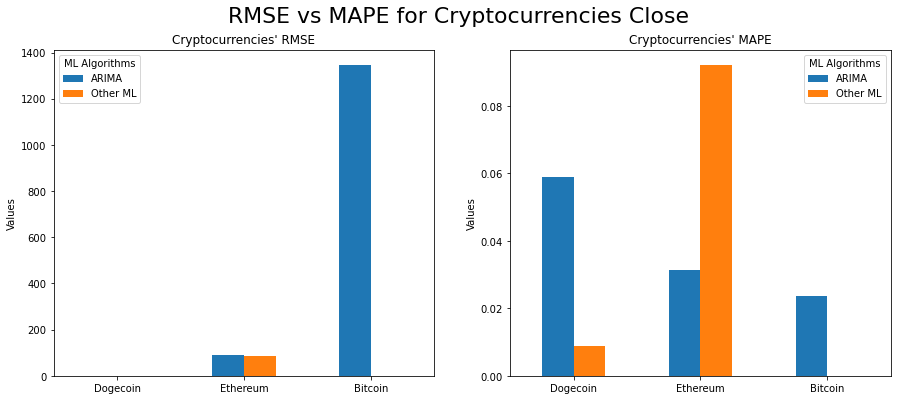

In [103]:
fig, axes=plt.subplots(figsize=(15,6), nrows=1, ncols=2)
fig.suptitle('RMSE vs MAPE for Cryptocurrencies Close',fontsize= 22)

rmse_plot.plot.bar(title="Cryptocurrencies' RMSE",ax=axes[0])
mape_plot.plot.bar(title="Cryptocurrencies' MAPE",ax=axes[1])

for ax in fig.axes:
    ax.tick_params(labelrotation=0)
    ax.set_xlabel(' ')
    ax.set_ylabel('Values')
    legend_labels = ['ARIMA', 'Other ML']
    ax.legend(labels = legend_labels, title = 'ML Algorithms')
plt.show();

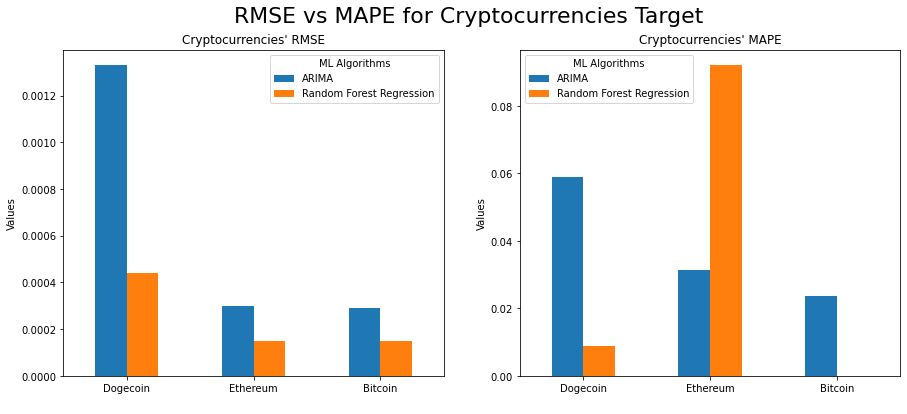

In [104]:
fig, axes=plt.subplots(figsize=(15,6), nrows=1, ncols=2)
fig.suptitle('RMSE vs MAPE for Cryptocurrencies Target',fontsize= 22)

RMSE_plot.plot.bar(title="Cryptocurrencies' RMSE",ax=axes[0])
MAPE_plot.plot.bar(title="Cryptocurrencies' MAPE",ax=axes[1])

for ax in fig.axes:
    ax.tick_params(labelrotation=0)
    ax.set_xlabel(' ')
    ax.set_ylabel('Values')
    legend_labels = ['ARIMA', 'Random Forest Regression']
    ax.legend(labels = legend_labels, title = 'ML Algorithms')
plt.show();

Qns8. Predict the next 10 days of future values of Bitcoin with your optimized machine learning
and ARIMA models and plot the result. (10marks)

In [105]:
# create a differenced series
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [106]:
from statsmodels.tsa.arima.model import ARIMA
#ARIMA for bitcoin Close
X = df_bitcoin['Close'].values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(0,2,1))
model_fit = model.fit()
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 9
#forecast = model_fit.forecast(steps=10)[0]
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
lst_bitcoin_close=[]
#day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    #print(day, inverted)
    #history.append(inverted)
    lst_bitcoin_close.append(inverted)
    #day += 1
lst_bitcoin_close

[42831.13134127758,
 42869.25725955675,
 42907.383177835916,
 42945.509096115085,
 42983.635014394255,
 43021.760932673424,
 43059.88685095259,
 43098.01276923176,
 43136.13868751093,
 43174.2646057901]

In [107]:
#ARIMA for bitcoin Target
X = df_Bitcoin['Target'].values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(0,0,0))
model_fit = model.fit()
start_index = len(differenced)
end_index = start_index + 9
# multi-step out-of-sample forecast
#forecast = model_fit.forecast(steps=10)[0]
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
lst_bitcoin_target=[]
#day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    #print(day, inverted)
    #history.append(inverted)
    lst_bitcoin_target.append(inverted)
    #day += 1
lst_bitcoin_target    

[2.8442770932138663e-06,
 2.8442770932138663e-06,
 2.8442770932138663e-06,
 2.8442770932138663e-06,
 2.8442770932138663e-06,
 2.8442770932138663e-06,
 2.8442770932138663e-06,
 2.8442770932138663e-06,
 2.8442770932138663e-06,
 2.8442770932138663e-06]

In [115]:
dict_lst={'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

model_ml = RandomForestRegressor(bootstrap=dict_lst['bootstrap'],
                               max_depth=dict_lst['max_depth'],
                               max_features=dict_lst['max_features'],
                               min_samples_leaf=dict_lst['min_samples_leaf'],
                               min_samples_split=dict_lst['min_samples_split'],
                               n_estimators=dict_lst['n_estimators'])
model_ml.fit(bitcoin_train_dataX, bitcoin_train_dataY)


RandomForestRegressor(bootstrap=False, max_depth=20, max_features='log2')

In [116]:
day_1=model_ml.predict([[45633.6017819 , 44795.95672101, 46043.47947925, 47577.23945919,
       47894.95977593, 47576.98054591, 48233.55870314, 47726.29657758,
       44626.69694851, 43002.505]])
day_1=float(",".join(str(x) for x in day_1))

day_2=model_ml.predict([[44795.95672101, 46043.47947925, 47577.23945919,
       47894.95977593, 47576.98054591, 48233.55870314, 47726.29657758,
       44626.69694851, 43002.505, day_1]])
day_2=float(",".join(str(x) for x in day_2))

day_3=model_ml.predict([[46043.47947925, 47577.23945919,
       47894.95977593, 47576.98054591, 48233.55870314, 47726.29657758,
       44626.69694851, 43002.505, day_1,day_2]])
day_3=float(",".join(str(x) for x in day_3))

day_4=model_ml.predict([[47577.23945919,
       47894.95977593, 47576.98054591, 48233.55870314, 47726.29657758,
       44626.69694851, 43002.505, day_1,day_2,day_3]])
day_4=float(",".join(str(x) for x in day_4))

day_5=model_ml.predict([[47894.95977593, 47576.98054591, 48233.55870314, 47726.29657758,
       44626.69694851, 43002.505, day_1,day_2,day_3,day_4]])
day_5=float(",".join(str(x) for x in day_5))

day_6=model_ml.predict([[47576.98054591, 48233.55870314, 47726.29657758,
       44626.69694851, 43002.505, day_1,day_2,day_3,day_4,day_5]])
day_6=float(",".join(str(x) for x in day_6))

day_7=model_ml.predict([[48233.55870314, 47726.29657758,
       44626.69694851, 43002.505, day_1,day_2,day_3,day_4,day_5,day_6]])
day_7=float(",".join(str(x) for x in day_7))

day_8=model_ml.predict([[47726.29657758,
       44626.69694851, 43002.505, day_1,day_2,day_3,day_4,day_5,day_6,day_7]])
day_8=float(",".join(str(x) for x in day_8))

day_9=model_ml.predict([[44626.69694851, 43002.505, day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8]])
day_9=float(",".join(str(x) for x in day_9))

day_10=model_ml.predict([[43002.505, day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9]])
day_10=float(",".join(str(x) for x in day_10))


ml_lst=[day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10]

In [117]:
dict_lst={'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 400}

Model_ml = RandomForestRegressor(bootstrap=dict_lst['bootstrap'],
                               max_depth=dict_lst['max_depth'],
                               max_features=dict_lst['max_features'],
                               min_samples_leaf=dict_lst['min_samples_leaf'],
                               min_samples_split=dict_lst['min_samples_split'],
                               n_estimators=dict_lst['n_estimators'])
Model_ml.fit(Bitcoin_train_dataX, Bitcoin_train_dataY)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=5, n_estimators=400)

In [118]:
Day_1=Model_ml.predict([[1.94228362e-05,  3.75423855e-05,  1.79699784e-04, -2.88302559e-05,
        8.06922606e-05,  7.87422627e-05,  1.25341176e-04, -2.24975678e-05,
       -1.41047283e-04,  2.72591938e-03]])
Day_1=float(",".join(str(x) for x in Day_1))

Day_2=Model_ml.predict([[3.75423855e-05,  1.79699784e-04, -2.88302559e-05,
        8.06922606e-05,  7.87422627e-05,  1.25341176e-04, -2.24975678e-05,
       -1.41047283e-04,  2.72591938e-03, Day_1]])
Day_2=float(",".join(str(x) for x in Day_2))

Day_3=Model_ml.predict([[1.79699784e-04, -2.88302559e-05,
        8.06922606e-05,  7.87422627e-05,  1.25341176e-04, -2.24975678e-05,
       -1.41047283e-04,  2.72591938e-03, Day_1,Day_2]])
Day_3=float(",".join(str(x) for x in Day_3))

Day_4=Model_ml.predict([[-2.88302559e-05,8.06922606e-05,  7.87422627e-05,  1.25341176e-04, -2.24975678e-05,
       -1.41047283e-04,  2.72591938e-03, Day_1,Day_2,Day_3]])
Day_4=float(",".join(str(x) for x in Day_4))

Day_5=Model_ml.predict([[8.06922606e-05,  7.87422627e-05,  1.25341176e-04, -2.24975678e-05,
       -1.41047283e-04,  2.72591938e-03, Day_1,Day_2,Day_3,Day_4]])
Day_5=float(",".join(str(x) for x in Day_5))

Day_6=Model_ml.predict([[7.87422627e-05,  1.25341176e-04, -2.24975678e-05,
       -1.41047283e-04,  2.72591938e-03, Day_1,Day_2,Day_3,Day_4,Day_5]])
Day_6=float(",".join(str(x) for x in Day_6))

Day_7=Model_ml.predict([[ 1.25341176e-04, -2.24975678e-05,
       -1.41047283e-04,  2.72591938e-03, Day_1,Day_2,Day_3,Day_4,Day_5,Day_6]])
Day_7=float(",".join(str(x) for x in Day_7))

Day_8=Model_ml.predict([[-2.24975678e-05,-1.41047283e-04, 2.72591938e-03, Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7]])
Day_8=float(",".join(str(x) for x in Day_8))

Day_9=Model_ml.predict([[-1.41047283e-04, 2.72591938e-03, Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8]])
Day_9=float(",".join(str(x) for x in Day_9))

Day_10=Model_ml.predict([[2.72591938e-03, Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9]])
Day_10=float(",".join(str(x) for x in Day_10))


Ml_lst=[Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10]

In [119]:
df_pred = pd.DataFrame(list(zip(lst_bitcoin_close,ml_lst)))
df_pred_close=df_pred.transpose()
df_pred_close.columns = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10']
df_pred_close.index=['ARIMA','Random Forest Regression']
df_pred_close.index.name = "Close"
df_pred_close

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10
Close,,,,,,,,,,
ARIMA,42831.131341,42869.257260,42907.383178,42945.509096,42983.635014,43021.760933,43059.886851,43098.012769,43136.138688,43174.264606
Random Forest Regression,13802.080911,13806.290088,13855.827254,13842.910767,13802.139933,13505.077525,12754.270183,11611.276726,11453.172739,11511.422876


In [120]:
df_Pred = pd.DataFrame(list(zip(lst_bitcoin_target,Ml_lst)))
df_Pred_target=df_Pred.transpose()
df_Pred_target.columns = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10']
df_Pred_target.index=['ARIMA','Random Forest Regression']
df_Pred_target.index.name = "Target"
df_Pred_target

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10
Target,,,,,,,,,,
ARIMA,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
Random Forest Regression,0.000028,0.000060,-0.000010,-0.000051,0.000015,0.000014,0.000047,-0.000013,-0.000011,-0.000008


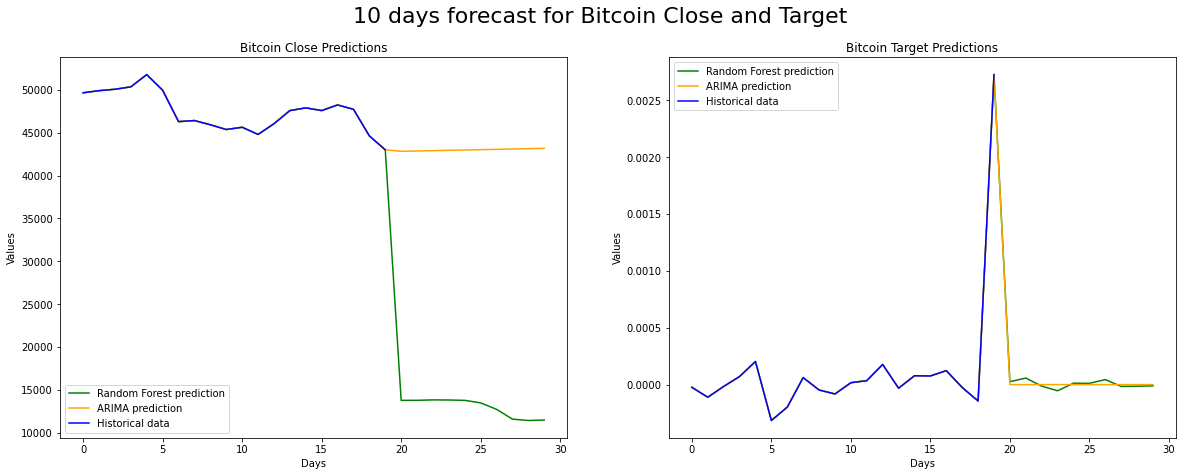

In [127]:
fig, axes=plt.subplots(figsize=(20,7), nrows=1, ncols=2)
fig.suptitle('10 days forecast for Bitcoin Close and Target',fontsize= 22)
ml_pred_arr = np.array(ml_lst)
ML_Pred_arr = np.array(Ml_lst)
arima_pred_arr=np.array(lst_bitcoin_close)
ARIMA_Pred_arr=np.array(lst_bitcoin_target    )
btc_arr=df_bitcoin[-20:].to_numpy()
btc_ml=np.append(btc_arr,ml_pred_arr)
btc_arima=np.append(btc_arr,lst_bitcoin_close)
BTC_arr=df_Bitcoin[-20:].to_numpy()
BTC_ml=np.append(BTC_arr,ML_Pred_arr)
BTC_arima=np.append(BTC_arr,ARIMA_Pred_arr)

axes[0].set_title('Bitcoin Close Predictions')
axes[0].plot(btc_ml,'green', label='Random Forest prediction')
axes[0].plot(btc_arima,'orange', label='ARIMA prediction')
axes[0].plot(btc_arr,'blue',label='Historical data')
axes[0].legend(loc="lower left")


axes[1].set_title('Bitcoin Target Predictions')
axes[1].plot(BTC_ml,'green', label='Random Forest prediction')
axes[1].plot(BTC_arima,'orange', label='ARIMA prediction')
axes[1].plot(BTC_arr,'blue', label='Historical data')
axes[1].legend(loc="upper left")

for ax in fig.axes:
    ax.set_xlabel('Days')
    ax.set_ylabel('Values');
